In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datasage.styles import DARK_THEME,LIGHT_THEME,theme
from datasage.core import Leonardo
leo = Leonardo()
plt.style.use(LIGHT_THEME)

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/

# Reading data

In [2]:
df = pd.read_csv('loan.csv')
# renaming columns for a better understanding
df.columns = [re.sub( '(?<!^)(?=[A-Z])', '_', x).lower() for x in df.columns.to_list()]
# df.head(5)

# EDA

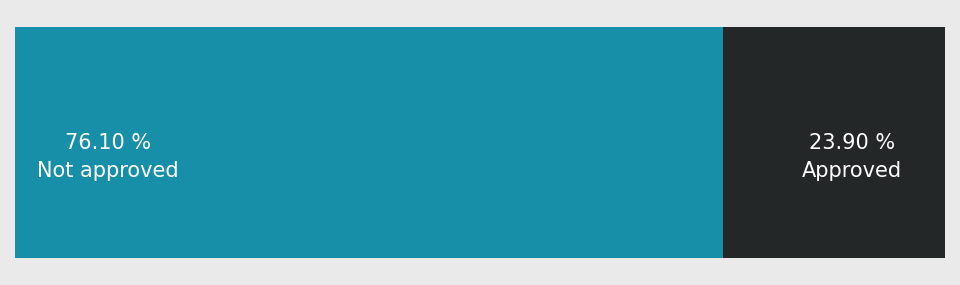

In [3]:
leo.binary_ratio_plot(data=df,column_name='loan_approved',target_zero_name="Not approved",target_one_name="Approved")

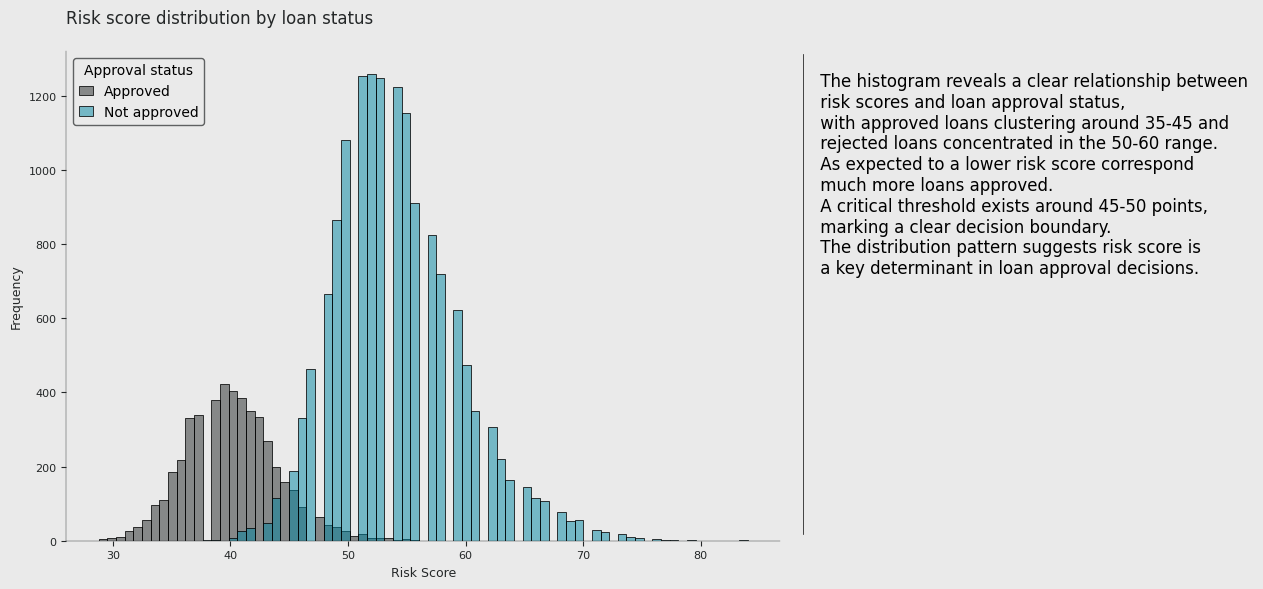

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='risk_score', hue='loan_approved', multiple="layer", alpha=0.5, ax=ax)
ax.set_title('Risk score distribution by loan status')
ax.set_xlabel('Risk Score')
ax.set_ylabel('Frequency')
ax.legend(title='Approval status',
          labels=['Approved', 'Not approved'],
          loc='upper left')
leo.insights_box(fig,
                 text_fontsize=12,
                 text_x=0.92,
                 text_y=0.5,
                 text = 
                 """
                 The histogram reveals a clear relationship between 
                 risk scores and loan approval status, 
                 with approved loans clustering around 35-45 and 
                 rejected loans concentrated in the 50-60 range.
                 As expected to a lower risk score correspond 
                 much more loans approved. 
                 A critical threshold exists around 45-50 points, 
                 marking a clear decision boundary. 
                 The distribution pattern suggests risk score is 
                 a key determinant in loan approval decisions.
                 """)
plt.show()

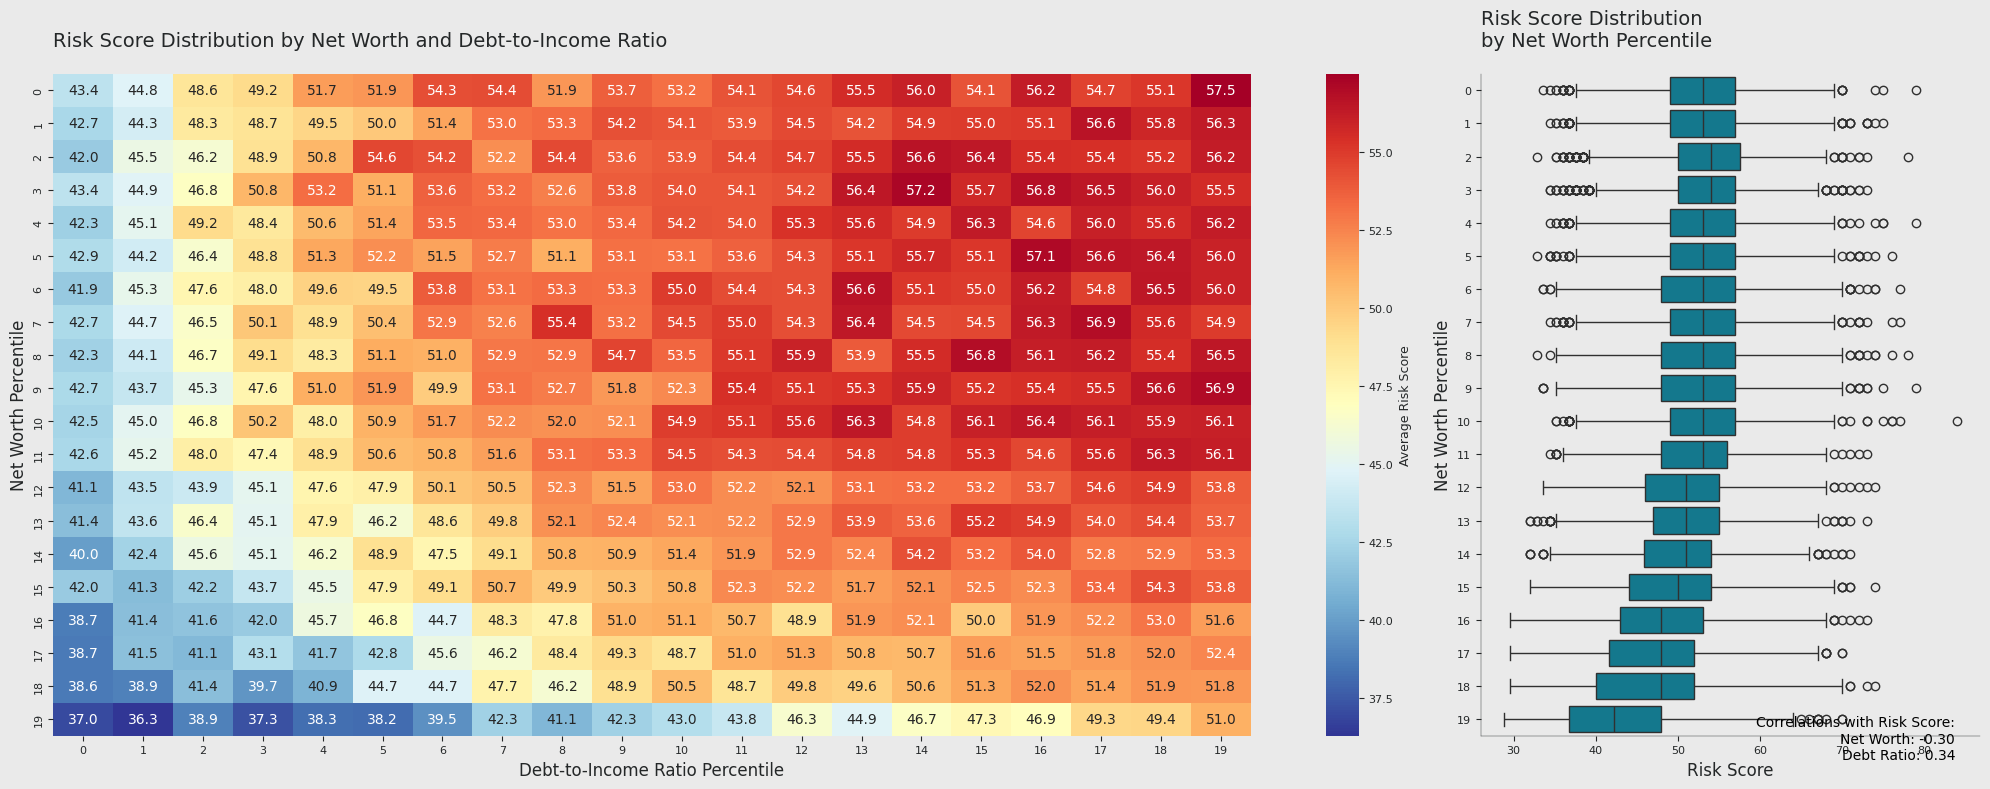

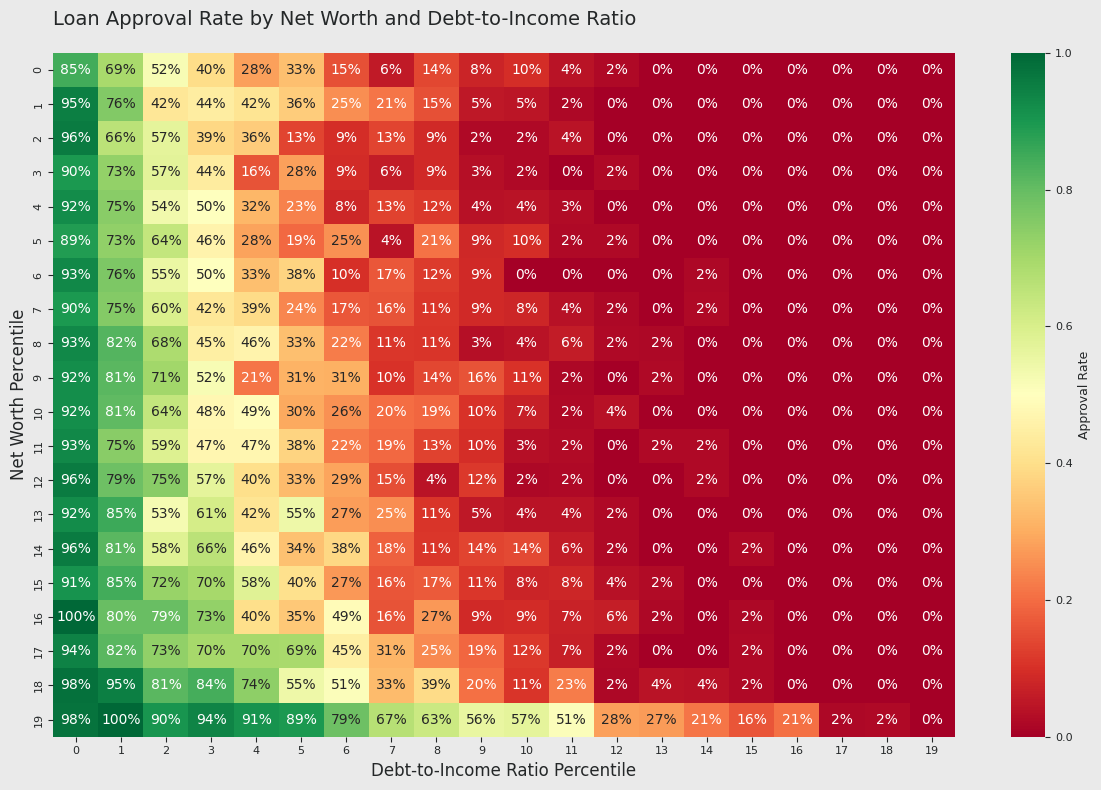

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Creiamo bins per il net worth e debt to income ratio
n_bins = 20

# Creiamo le categorie per net worth e debt to income ratio
net_worth_bins = pd.qcut(df['net_worth'], n_bins, labels=False)
debt_ratio_bins = pd.qcut(df['total_debt_to_income_ratio'], n_bins, labels=False)

# Creiamo un pivot table con i valori medi del risk score
pivot_data = df.groupby([net_worth_bins, debt_ratio_bins])['risk_score'].mean().unstack()

# Creiamo la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [3, 1]})

# Creiamo la heatmap principale
sns.heatmap(pivot_data,
            cmap='RdYlBu_r',  # Rosso per risk score alto, blu per basso
            annot=True,       # Mostra i valori
            fmt='.1f',        # Formato dei valori (1 decimale)
            cbar_kws={'label': 'Average Risk Score'},
            ax=ax1)

# Personalizziamo gli assi della heatmap
ax1.set_title('Risk Score Distribution by Net Worth and Debt-to-Income Ratio', 
              fontsize=14, pad=20)
ax1.set_xlabel('Debt-to-Income Ratio Percentile', fontsize=12)
ax1.set_ylabel('Net Worth Percentile', fontsize=12)

# Creiamo un box plot aggiuntivo per mostrare la distribuzione del risk score
sns.boxplot(data=df, y=net_worth_bins, x='risk_score', ax=ax2, orient='h')
ax2.set_title('Risk Score Distribution\nby Net Worth Percentile', fontsize=14)
ax2.set_xlabel('Risk Score', fontsize=12)
ax2.set_ylabel('Net Worth Percentile', fontsize=12)

# Aggiungiamo statistiche aggiuntive
stats_text = f"""
Correlations with Risk Score:
Net Worth: {df['net_worth'].corr(df['risk_score']):.2f}
Debt Ratio: {df['total_debt_to_income_ratio'].corr(df['risk_score']):.2f}
"""
fig.text(0.98, 0.02, stats_text, fontsize=10, ha='right', va='bottom')

plt.tight_layout()
plt.show()

# Creiamo un grafico supplementare per mostrare la distribuzione delle approvazioni
fig, ax = plt.subplots(figsize=(12, 8))

# Calcoliamo il tasso di approvazione per ogni bin
approval_pivot = df.groupby([net_worth_bins, debt_ratio_bins])['loan_approved'].mean().unstack()

# Creiamo una seconda heatmap per il tasso di approvazione
sns.heatmap(approval_pivot,
            cmap='RdYlGn',  # Rosso per basso tasso di approvazione, verde per alto
            annot=True,
            fmt='.0%',
            cbar_kws={'label': 'Approval Rate'},
            ax=ax)

ax.set_title('Loan Approval Rate by Net Worth and Debt-to-Income Ratio', 
             fontsize=14, pad=20)
ax.set_xlabel('Debt-to-Income Ratio Percentile', fontsize=12)
ax.set_ylabel('Net Worth Percentile', fontsize=12)

plt.tight_layout()
plt.show()